### Author Statement
This project has been developed by Mustafa Neguib who is a student of
Masters of Information Technology at The University of Melbourne and has
student id 922939.
You can contact the developer at mneguib@student.unimelb.edu.au


In [1]:
# Run these commands if you need to install the following packages.
#Install either these commands. On Azure Notebooks after osmnx has installed all of the packages, 
#for some reason geopandas is not installed. On my local system i did not face these issues in setting up
#the environment.
"""
!conda install -c conda-forge osmnx -y
!conda install -c conda-forge libpysal -y
!conda install -c conda-forge esda -y
!conda install -c conda-forge scikit-learn -y
!conda install -c conda-forge seaborn -y
!conda install -c conda-forge pysolar -y

"""
#If we install the packages individually then libspatialindex is able to be installed.
"""
!conda install -c conda-forge folium -y
!conda install -c conda-forge geopandas -y
!conda install -c conda-forge shapely -y
!conda install -c conda-forge matplotlib -y
!conda install -c conda-forge scikit-learn -y
!conda install -c conda-forge libpysal -y
!conda install -c conda-forge mapclassify -y
!conda install -c conda-forge esda -y
!conda install -c conda-forge seaborn -y
!conda install -c conda-forge rtree -y
!conda install -c conda-forge libspatialindex -y
!conda install -c conda-forge libpysal -y
!conda install -c conda-forge pysolar -y
"""

'\n!conda install -c conda-forge folium -y\n!conda install -c conda-forge geopandas -y\n!conda install -c conda-forge shapely -y\n!conda install -c conda-forge matplotlib -y\n!conda install -c conda-forge scikit-learn -y\n!conda install -c conda-forge libpysal -y\n!conda install -c conda-forge mapclassify -y\n!conda install -c conda-forge esda -y\n!conda install -c conda-forge seaborn -y\n!conda install -c conda-forge rtree -y\n!conda install -c conda-forge libspatialindex -y\n!conda install -c conda-forge libpysal -y\n!conda install -c conda-forge pysolar -y\n'

In [2]:
from assign2_modules import *
import os
import numpy as np
import geopandas
import pandas
from shapely import geometry
from shapely import wkt
from shapely.ops import triangulate
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.cluster import DBSCAN
from sklearn import metrics
import libpysal as lps
import mapclassify as mc
import esda
import seaborn as sbn
import random
import folium

# In order to make the function to_crs work I had to define the PROJ_LIB to the path given below.
# For some reason the PROJ_LIB environment variable is empty.
# This is required for Task 2 Question 3 to work when we have to transform the SA2 shape file to 4326 crs
# Change to a path on your own computer
#os.environ['PROJ_LIB'] = r"C:\Users\Mustafa Neguib\Anaconda3\pkgs\proj4-6.0.0-ha7a8c7b_0\Library\share\proj"

# Task 1

In [3]:
# The lists of the form *_required_columns list the columns that are required in order to read the appropriate csv file.
# If the csv file does not have the correct number of columns or the columns with the names then we can not read the file
# as it does not contain the correct data.

# 'ACCIDENT.csv'
accident_required_columns = ["ACCIDENT_NO", "ACCIDENTDATE", "ACCIDENTTIME", "ACCIDENT_TYPE", "Accident Type Desc",
                                 "DAY_OF_WEEK", "Day Week Description", "DCA_CODE", "DCA Description", "DIRECTORY",
                                 "EDITION", "PAGE", "GRID_REFERENCE_X", "GRID_REFERENCE_Y", "LIGHT_CONDITION",
                                 "Light Condition Desc", "NODE_ID", "NO_OF_VEHICLES", "NO_PERSONS", "NO_PERSONS_INJ_2",
                                 "NO_PERSONS_INJ_3", "NO_PERSONS_KILLED", "NO_PERSONS_NOT_INJ", "POLICE_ATTEND",
                                 "ROAD_GEOMETRY", "Road Geometry Desc", "SEVERITY", "SPEED_ZONE"]
accidents_data_frame = read_csv_file("input/ACCIDENT.csv", accident_required_columns)

# 'ACCIDENT_CHAINAGE.csv'
accident_chainage_required_columns = ["Node Id", "Route No", "Chainage Seq", "Route Link", "Chainage"]

# 'ACCIDENT_EVENT.csv'
accident_event_required_columns = ["ACCIDENT_NO", "EVENT_SEQ_NO", "EVENT_TYPE", "Event Type Desc", "VEHICLE_1_ID",
                                      "VEHICLE_1_COLL_PT", "Vehicle 1 Coll Pt Desc", "VEHICLE_2_ID",
                                      "VEHICLE_2_COLL_PT", "Vehicle 2 Coll Pt Desc", "PERSON_ID", "OBJECT_TYPE",
                                      "Object Type Desc"]

# 'ACCIDENT_LOCATION.csv'
accident_location_required_columns = ["ACCIDENT_NO", "NODE_ID", "ROAD_ROUTE_1", "ROAD_NAME", "ROAD_TYPE",
                                          "ROAD_NAME_INT", "ROAD_TYPE_INT", "DISTANCE_LOCATION", "DIRECTION_LOCATION",
                                          "NEAREST_KM_POST", "OFF_ROAD_LOCATION"]
accidents_location_data_frame = read_csv_file("input/ACCIDENT_LOCATION.csv", accident_location_required_columns)

# 'ATMOSPHERIC_COND.csv'
atmospheric_con_required_columns = ["ACCIDENT_NO", "ATMOSPH_COND", "ATMOSPH_COND_SEQ", "Atmosph Cond Desc"]
atomospheric_con_data_frame = read_csv_file('input/ATMOSPHERIC_COND.csv', atmospheric_con_required_columns)

# 'NODE_ID_COMPLEX_INT_ID.csv'
node_id_complex_required_columns = ["ACCIDENT_NO", "NODE_ID", "COMPLEX_INT_NO"]

# 'NODE.csv'
node_required_column = ["ACCIDENT_NO", "NODE_ID", "NODE_TYPE", "AMG_X", "AMG_Y", "LGA_NAME", "Lga Name All",
                            "Region Name", "Deg Urban Name", "Lat", "Long", "Postcode No"]
node_data_frame = read_csv_file("input/NODE.csv", node_required_column)
    
# 'PERSON.csv'
person_required_columns = ["ACCIDENT_NO", "PERSON_ID", "VEHICLE_ID", "SEX", "AGE", "Age Group", "INJ_LEVEL",
                           "Inj Level Desc", "SEATING_POSITION", "HELMET_BELT_WORN", "ROAD_USER_TYPE",
                           "Road User Type Desc", "LICENCE_STATE", "PEDEST_MOVEMENT", "POSTCODE", "TAKEN_HOSPITAL",
                           "EJECTED_CODE"]
person_data_frame = read_csv_file("input/PERSON.csv", person_required_columns)

# 'ROAD_SURFACE_COND.csv'
road_surface_required_columns = ["ACCIDENT_NO", "SURFACE_COND", "Surface Cond Desc", "SURFACE_COND_SEQ"]
road_surface_data_frame = read_csv_file('input/ROAD_SURFACE_COND.csv', road_surface_required_columns)

# 'VEHICLE.csv'
vehicle_required_columns = ["ACCIDENT_NO", "VEHICLE_ID", "VEHICLE_YEAR_MANUF", "VEHICLE_DCA_CODE",
                                "INITIAL_DIRECTION", "ROAD_SURFACE_TYPE", "Road Surface Type Desc", "REG_STATE",
                                "VEHICLE_BODY_STYLE", "VEHICLE_MAKE", "VEHICLE_MODEL", "VEHICLE_POWER", "VEHICLE_TYPE",
                                "Vehicle Type Desc", "VEHICLE_WEIGHT", "CONSTRUCTION_TYPE", "FUEL_TYPE", "NO_OF_WHEELS",
                                "NO_OF_CYLINDERS", "SEATING_CAPACITY", "TARE_WEIGHT", "TOTAL_NO_OCCUPANTS",
                                "CARRY_CAPACITY", "CUBIC_CAPACITY", "FINAL_DIRECTION", "DRIVER_INTENT",
                                "VEHICLE_MOVEMENT", "TRAILER_TYPE", "VEHICLE_COLOUR_1", "VEHICLE_COLOUR_2",
                                "CAUGHT_FIRE", "INITIAL_IMPACT", "LAMPS", "LEVEL_OF_DAMAGE", "OWNER_POSTCODE",
                                "TOWED_AWAY_FLAG", "TRAFFIC_CONTROL", "Traffic Control Desc"]
vehicles_data_frame = read_csv_file('input/VEHICLE.csv', vehicle_required_columns)

# Create the output directory
create_output_directory()


C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (3,25,26,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [4]:
# Initializing the required variables
years = set()
accident_types_desc = set()
number_accidents_per_years = {}
vehicle_types_desc = set()
html_content = ""

### Question 1 and 2

In [5]:
# Calculate the statistics about accidents by vehicle and years.
html_content, accidents_data_frame_few_columns = calculate_accident_statistics(accidents_data_frame)

Average number of accidents per year: 13788.55
The second most common type of accident in all the recorded years is 'Collision with a fixed object', and the percentage of the accidents that belong to this type is 16.56%


### Question 3

In [6]:
#Generate a table for accident data which is listed by the vehicle type and year. 
html_string=""
html_string, accidents_with_vehicles =  generate_accidents_by_type_and_year(accidents_data_frame_few_columns, vehicles_data_frame)
html_content += html_string

YEAR                                                   2006     2007     2008  \
Vehicle Type Desc                                                               
Bicycle                                              1256.0   1312.0   1384.0   
Bus/Coach                                             106.0    133.0    125.0   
Car                                                 13395.0  13178.0  13640.0   
Heavy Vehicle (Rigid) > 4.5 Tonnes                    263.0    387.0    394.0   
Horse (ridden or drawn)                                 1.0      1.0      1.0   
Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM    204.0    249.0    255.0   
Mini Bus(9-13 seats)                                   23.0     16.0     29.0   
Moped                                                  12.0     18.0     16.0   
Motor Cycle                                          1818.0   1951.0   2076.0   
Motor Scooter                                          54.0    118.0    143.0   
Not Applicable              

### Question 4

In [7]:
# Compute the top 10 LGA areas where most of the accidents have occured
html_content += compute_top10_lga_accidents(accidents_data_frame, node_data_frame)

               LGA_NAME  NUM_2006  NUM_2016  DIFFERENCE     CHANGE
0             MELBOURNE       862       763         -99 -11.484919
1                 CASEY       516       606          90  17.441860
2             DANDENONG       478       516          38   7.949791
3               GEELONG       468       503          35   7.478632
4          YARRA RANGES       443       410         -33  -7.449210
5                MONASH       418       373         -45 -10.765550
6              KINGSTON       384       306         -78 -20.312500
7              MORELAND       368       382          14   3.804348
8  MORNINGTON PENINSULA       355       294         -61 -17.183099
9              BRIMBANK       348       416          68  19.540230


### Question 5

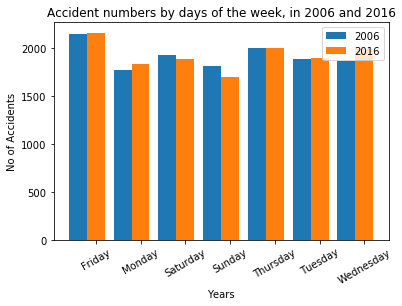

In [8]:
html_content += plot_accidents_by_day_week(accidents_data_frame)

### Question 6

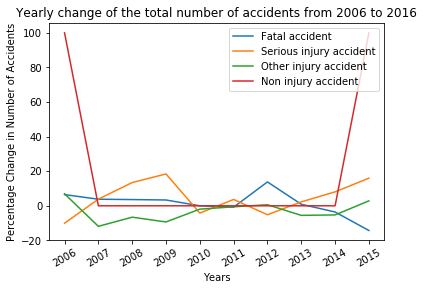

In [9]:
html_content += plot_accidents_by_severity_year(accidents_data_frame)
write_to_html_file(html_content, 'task1_922939.html','Task 1 922939')

# Task 2

### Question 1

In [10]:
# This function combines the three provided data frames and builds the resulting shape file which is then saved to the disk
build_accident_locations_shape_file(accidents_data_frame, vehicles_data_frame, node_data_frame)

### Question 2

In [11]:
# I am reading in the AccidentsLocation shape file that was built in Question 1
# There is a limitation in shapefiles that the column names must be less than or equal to 10 characters in length. Names longer than this, are trunctaed to 10 characters.
# In the original accidents_locations data frame the column AccidentNu was AccidentNumber and so on.
required_columns = ['AccidentNu', 'DayOfWeek', 'VehicleTyp', 'SevereAcci', 'geometry']
accidents_locations = read_shape_file('output/AccidentsLocation.shp', required_columns)
build_weekday_weekend_shape_files(accidents_locations)

### Question 3

In [12]:
# SA2 shape file contains the geometries in 2016 of Australia. Do note that we only need a small subset of what we have. The extraction of the subset has been handled in this function.
required_columns = ['SA2_MAIN16', 'SA2_5DIG16', 'SA2_NAME16', 'SA3_CODE16', 'SA3_NAME16',
       'SA4_CODE16', 'SA4_NAME16', 'GCC_CODE16', 'GCC_NAME16', 'STE_CODE16',
       'STE_NAME16', 'AREASQKM16', 'geometry']
sa2 = read_shape_file('input/SA2_2016_AUST.shp', required_columns)

In [13]:
# This function uses sjoin and is dramatically faster and (takes 17 seconds to complete its execution) than the other function add_sa2_names_to_accidents_locations_shape_file which is an alternative to this function but is much slower
# I am calling this function for practical reasons and not to spend too much time waiting for the code to run.
accidents_locations, sa2_areas_of_interest = add_sa2_names_to_accidents_locations_shape_file_sjoin(sa2)

C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\geopandas\tools\sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'init': 'epsg:4326', 'no_defs': True})
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [14]:
# This function takes an average of 5 minutes 30 seconds. An explanation for the long execution time has been givenin the function's documentation.
#accidents_locations, sa2_areas_of_interest = add_sa2_names_to_accidents_locations_shape_file(sa2)

# Task 3

### Spatial Temporal Visual Analysis (Basic)

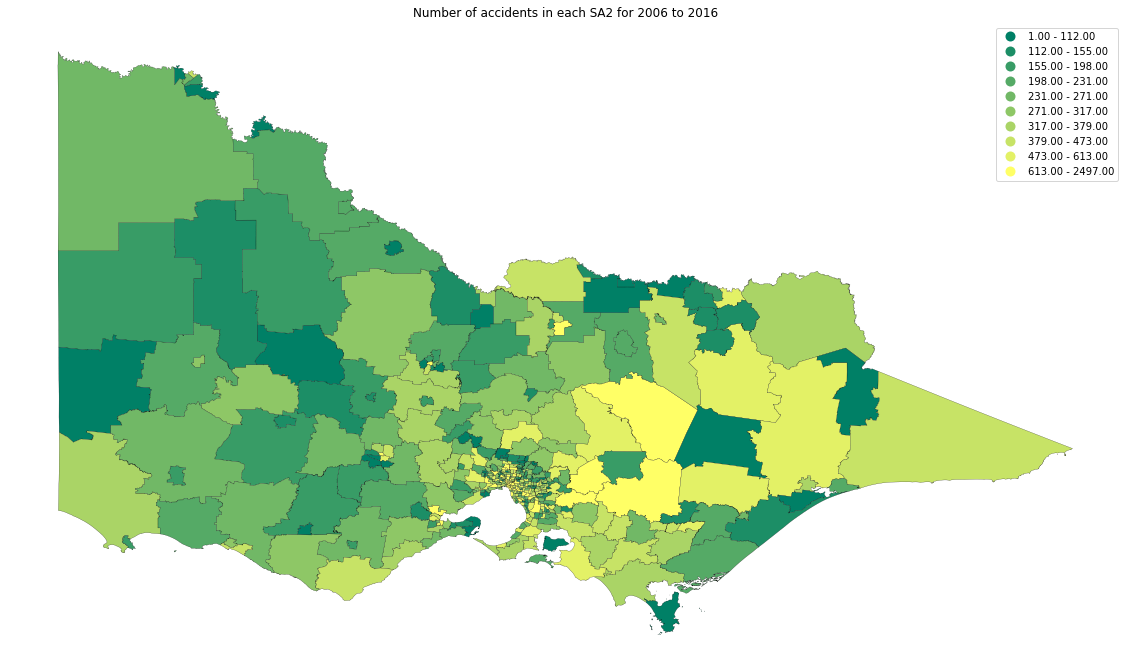

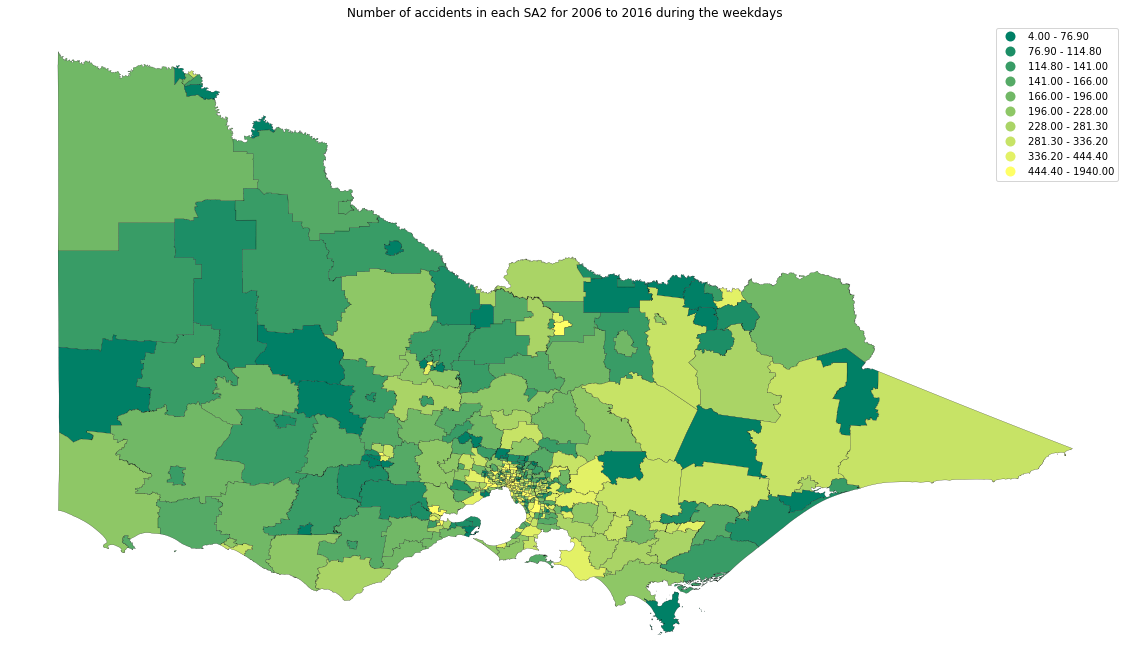

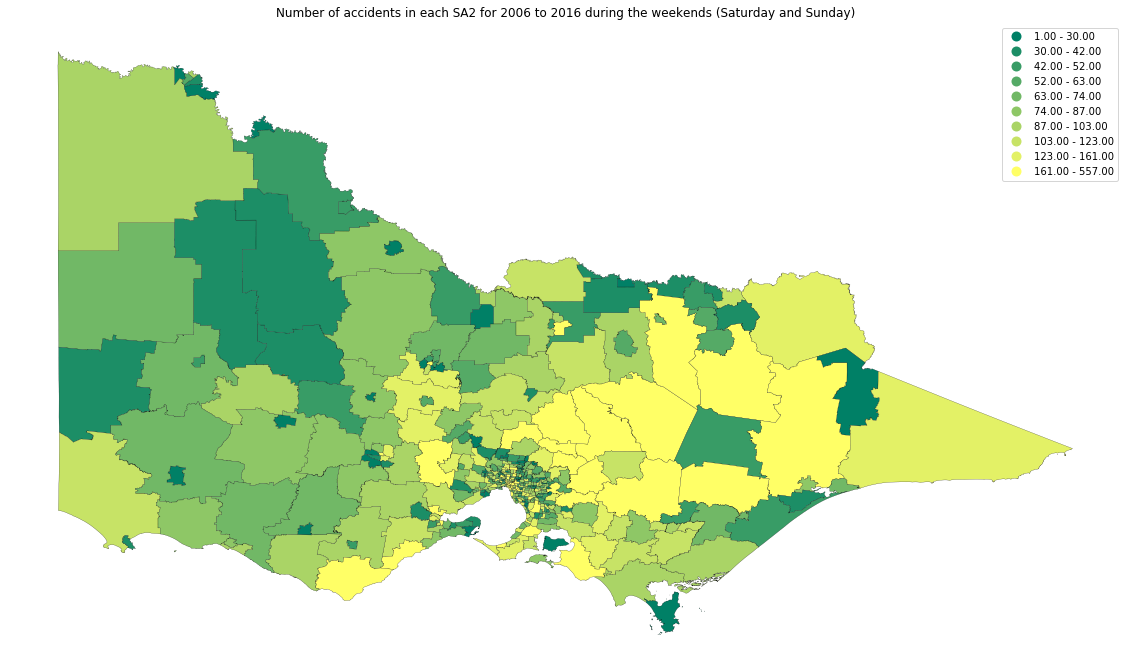

In [15]:
html_content=""
html_content, sa2_with_accident_counts = spatial_visual_analysis(accidents_locations,sa2_areas_of_interest, html_content)

### Spatial Autocorellation Calculation (Advanced)

C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\libpysal\weights\weights.py:168: UserWarning: There are 2 disconnected observations 
  Island ids: 86, 89
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')


C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\libpysal\weights\weights.py:168: UserWarning: There are 2 disconnected observations 
  Island ids: 86, 89
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


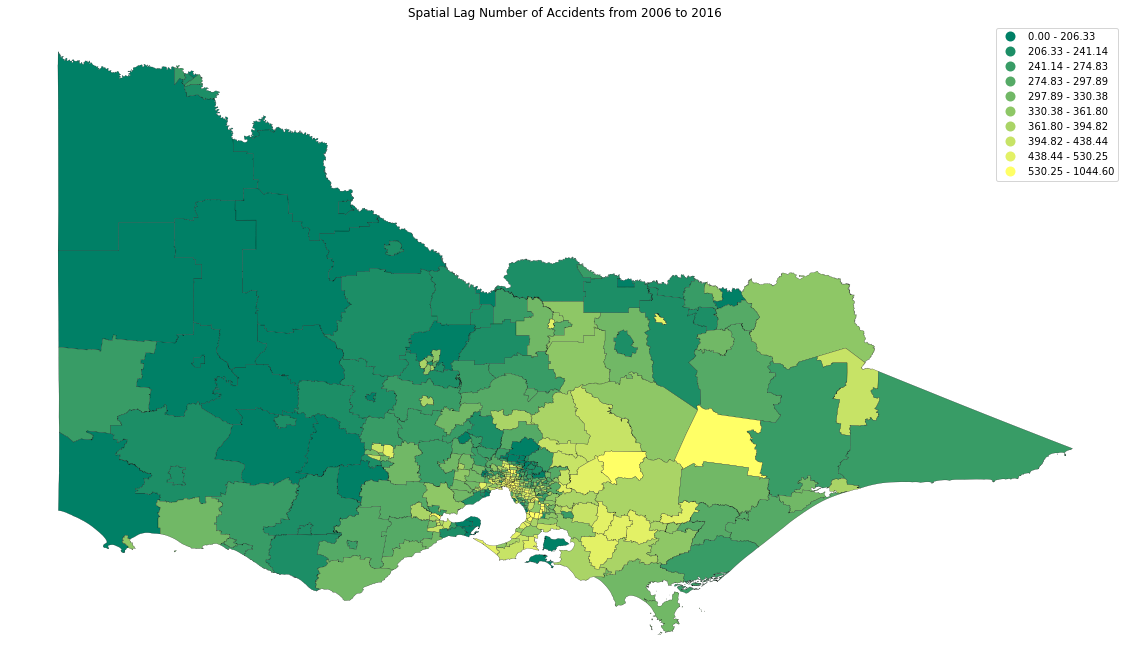

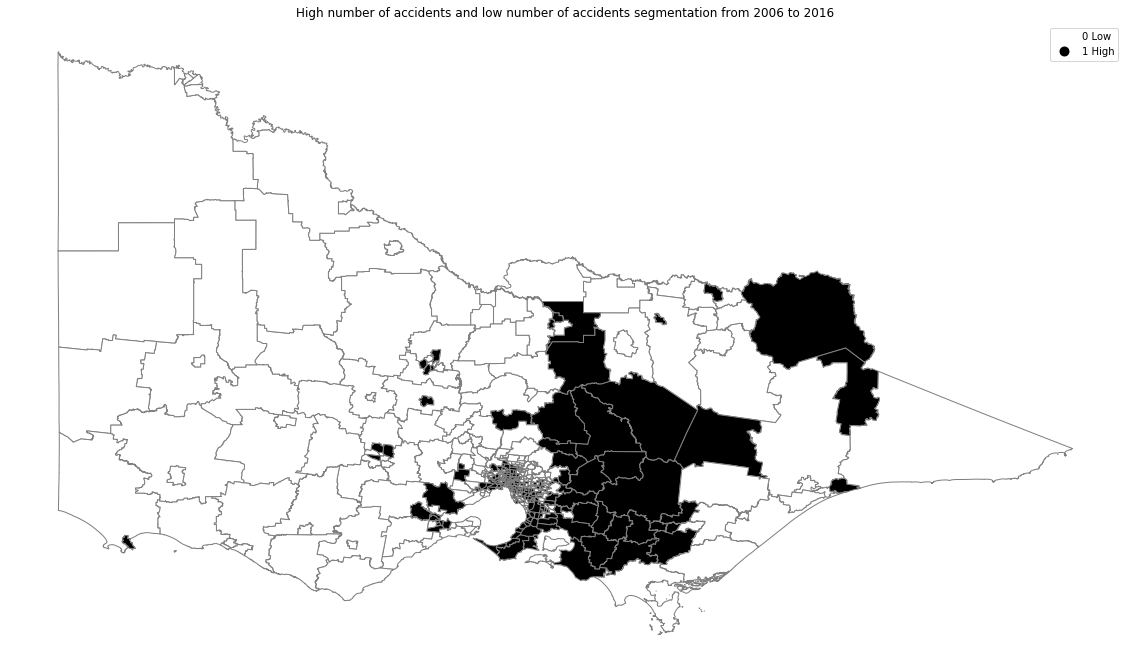

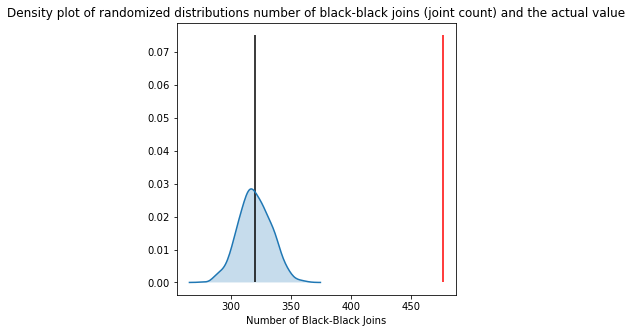

In [16]:
# Autocorrelation is calculated and in order to prove that the null-hypotheses (The clusters are randomly distributed) wrong we also perform a
# p-value test which proves that the clusters are indeed not randomly distributed and infact are clustered, where the neighbouring SA2 areas are
# similar to each other. The result of the p-value test is shown in the distribution plot shown below. We are also generating visualization maps
# which show the clustering to further support our claim.
html_content, sa2_with_accident_counts = spatial_autocorrelation(sa2_with_accident_counts, html_content)

### Clustering Analysis (More Advanced)

In [17]:
# The clustering analysis has been performed using DBSCAN, and shows that theer are 43 groups. Since we used the latitude, and longitude as parameters to plot against
# the clustering shows how close the accidents are spatially. We also showed the clusters overlayed over a basemap which further helps
# us in further analyzing the results and gives us a context as well.
group_by_num_parties, group_by_atmos_surface, m, group_by_age_group, group_by_sex, group_by_helmet_worn, coords, db,accidents_from_max_accidents_sa2, group_by_atmos_cond, group_by_road_surface, html_content = clustering_analysis(accidents_location_data_frame, road_surface_data_frame, atomospheric_con_data_frame, person_data_frame, accidents_locations, sa2_with_accident_counts, html_content)
m

C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\geopandas\tools\sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'init': 'epsg:4326', 'no_defs': True})
  '(%s != %s)' % (left_df.crs, right_df.crs))


coords_db_scan
[[-37.81961 144.96002]
 [-37.81332 144.97395]
 [-37.81939 144.95711]
 ...
 [-37.80632 144.95592]
 [-37.81493 144.96628]
 [-37.81175 144.95645]]


D:\university of melbourne lectures\semester 4\Spatial Information Programming\Assignments\Assignment 2\notebook\project\assign2_modules.py:1486: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  classify_helmet_belt_worn)


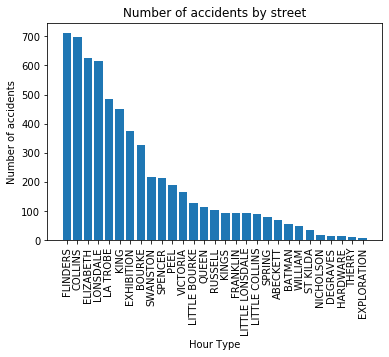

C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


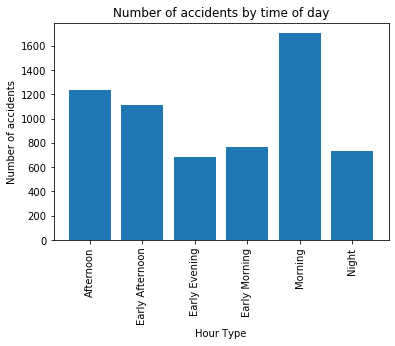

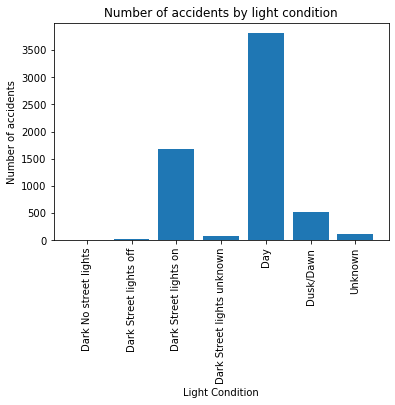

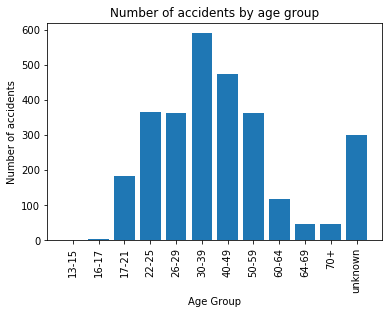

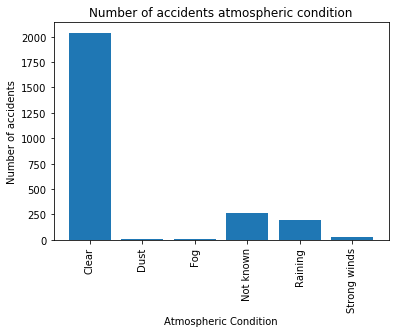

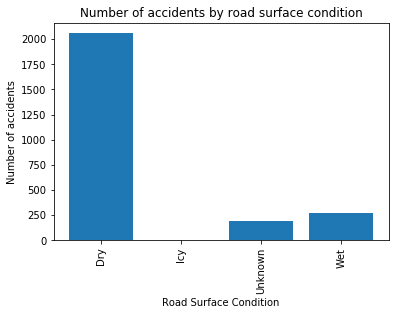

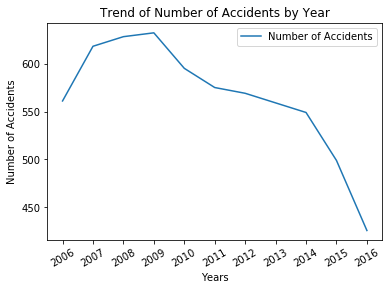

In [18]:
# We further analyzed the data and made an attempt to try to reason as to why the accidents may have taken place. Our analysis and conclusions
# have been provided in the task3_922939.html report. We also performed calculated the correlation coefficient value in order to find if 
# the variables in each of the graphs are related or not.
further_analysis_graphs(group_by_num_parties, group_by_atmos_surface, m, group_by_age_group, group_by_sex, group_by_helmet_worn, coords, db,accidents_from_max_accidents_sa2, group_by_atmos_cond, group_by_road_surface, html_content, accidents_data_frame)